# Quality Control of Whole Genome Sequencing

## Display metrics correlation

In [188]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import scipy.stats as stats

# Load the two pipelines metrics from a csv file
df=pd.read_csv("../n.100-1kg-dragen3.7.6-npm-sample-qc-dragen-correlation-metrics.csv")

df

# Read the samples metadata csv file into pandas DataFrames
df_metadata = pd.read_csv('../1KG_100samples_info_igsr.csv')
df_metadata

# Select only the 'Sample_name' 'Sex' and 'Superpopulation_code' columns from df_metadata
df_metadata = df_metadata[['Sample_name', 'Sex', 'Superpopulation_code']]


# Merge the DataFrames on the 'Sample_name' column, retaining all rows from df
# merged_df = pd.merge(df, df_metadata1, on='Sample_name', how='left')
merged_dft = pd.merge(df, df_metadata, left_on='samples', right_on='Sample_name', how='left')

merged_dft

,samples,snv,het-hom,ti-tv,snv-dragen,het-hom-dragen,ti-tv-dragen,insertion-dragen,deletion-dragen,insertion,deletion,ins-del-ratio-dragen,ins-del-ratio,Sample_name,Sex,Superpopulation_code
0,NA20126,4592368,2.14,1.97,4770140,2.26,1.96,523917,536443,472931,494200,0.98,0.96,NA20126,male,AFR
1,NA20127,4699751,2.04,1.97,4918959,2.18,1.97,562430,572733,485645,505302,0.98,0.96,NA20127,female,AFR
2,NA20128,4636463,2.09,1.97,4854107,2.22,1.97,552634,566283,478801,500632,0.98,0.96,NA20128,female,AFR
3,NA20129,4638940,2.11,1.97,4863336,2.23,1.97,552984,565534,478078,499867,0.98,0.96,NA20129,female,AFR
4,NA20274,4339811,2.10,1.96,4554995,2.23,1.96,524046,530728,456420,471116,0.99,0.97,NA20274,female,AFR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NA21135,3975358,1.59,1.96,4115967,1.67,1.95,467998,471144,425797,438778,0.99,0.97,NA21135,male,SAS
96,NA21137,3985175,1.61,1.96,4160156,1.68,1.95,483979,489399,425960,440363,0.99,0.97,NA21137,female,SAS
97,NA21141,3990468,1.59,1.95,4163396,1.66,1.95,484522,487820,425985,439259,0.99,0.97,NA21141,female,SAS
98,NA21142,3974378,1.58,1.96,4145901,1.66,1.95,484512,488002,425350,438564,0.99,0.97,NA21142,female,SAS


In [157]:
# x = merged_dft['snv']
# y = merged_dft['snv-dragen']

# x_min = merged_dft['snv'].min()
# x_max = merged_dft['snv'].max()

# y_min = merged_dft['snv-dragen'].min()
# y_max = merged_dft['snv-dragen'].max()

# lineStart = min(x_min,y_min)
# lineEnd = max(x_max,y_max)


In [189]:
# npm_col = merged_dft.iloc[1:4]
# npm_col = merged_dft[merged_dft.columns[1:13]]
npm_col = merged_dft[['snv', 'het-hom', 'ti-tv', 'insertion', 'deletion', 'ins-del-ratio']]
npm_col


,snv,het-hom,ti-tv,insertion,deletion,ins-del-ratio
0,4592368,2.14,1.97,472931,494200,0.96
1,4699751,2.04,1.97,485645,505302,0.96
2,4636463,2.09,1.97,478801,500632,0.96
3,4638940,2.11,1.97,478078,499867,0.96
4,4339811,2.10,1.96,456420,471116,0.97
...,...,...,...,...,...,...
95,3975358,1.59,1.96,425797,438778,0.97
96,3985175,1.61,1.96,425960,440363,0.97
97,3990468,1.59,1.95,425985,439259,0.97
98,3974378,1.58,1.96,425350,438564,0.97


In [190]:
# dragen_col = merged_dft[merged_dft.columns[4:7]]
dragen_col = merged_dft[['snv-dragen', 'het-hom-dragen', 'ti-tv-dragen', 'insertion-dragen', 'deletion-dragen', 'ins-del-ratio-dragen']]
dragen_col

,snv-dragen,het-hom-dragen,ti-tv-dragen,insertion-dragen,deletion-dragen,ins-del-ratio-dragen
0,4770140,2.26,1.96,523917,536443,0.98
1,4918959,2.18,1.97,562430,572733,0.98
2,4854107,2.22,1.97,552634,566283,0.98
3,4863336,2.23,1.97,552984,565534,0.98
4,4554995,2.23,1.96,524046,530728,0.99
...,...,...,...,...,...,...
95,4115967,1.67,1.95,467998,471144,0.99
96,4160156,1.68,1.95,483979,489399,0.99
97,4163396,1.66,1.95,484522,487820,0.99
98,4145901,1.66,1.95,484512,488002,0.99


Text(0.1, 0.95, 'r = 1.00')

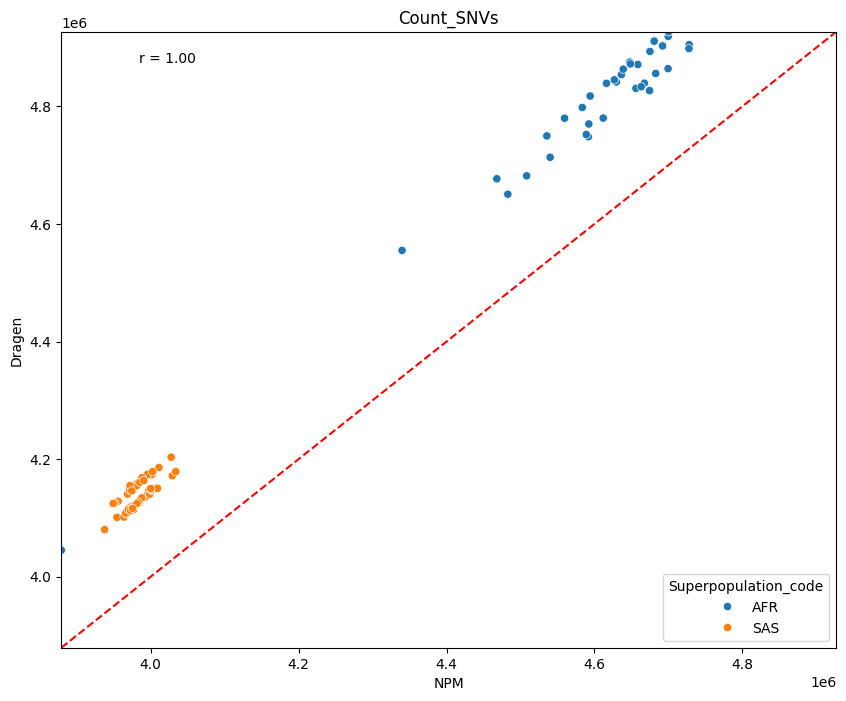

In [220]:
# plt.scatter(x, y, c='tab:blue')

# Create a scatter plot
sns.scatterplot(data=merged_dft, x='snv', y='snv-dragen', hue='Superpopulation_code' )
plt.xlabel('NPM')
plt.ylabel('Dragen')
plt.title('Count_SNVs')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

plt.plot([lineStart, lineEnd], [lineStart, lineEnd], color = 'r', linestyle = 'dashed')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
r, p = stats.pearsonr(x, y)
plt.annotate('r = {:.2f}'.format(r), xy=(0.1, 0.95), xycoords='axes fraction')

# plt.legend(bbox_to_anchor=(1.025,1), loc='upper left', borderaxespad=0.)


In [230]:
# plt.scatter(x, y, c='tab:blue')
xcols = npm_col.columns.tolist()
xcols

['snv', 'het-hom', 'ti-tv', 'insertion', 'deletion', 'ins-del-ratio']

In [231]:
ycols = dragen_col.columns.tolist()
ycols

['snv-dragen',
 'het-hom-dragen',
 'ti-tv-dragen',
 'insertion-dragen',
 'deletion-dragen',
 'ins-del-ratio-dragen']

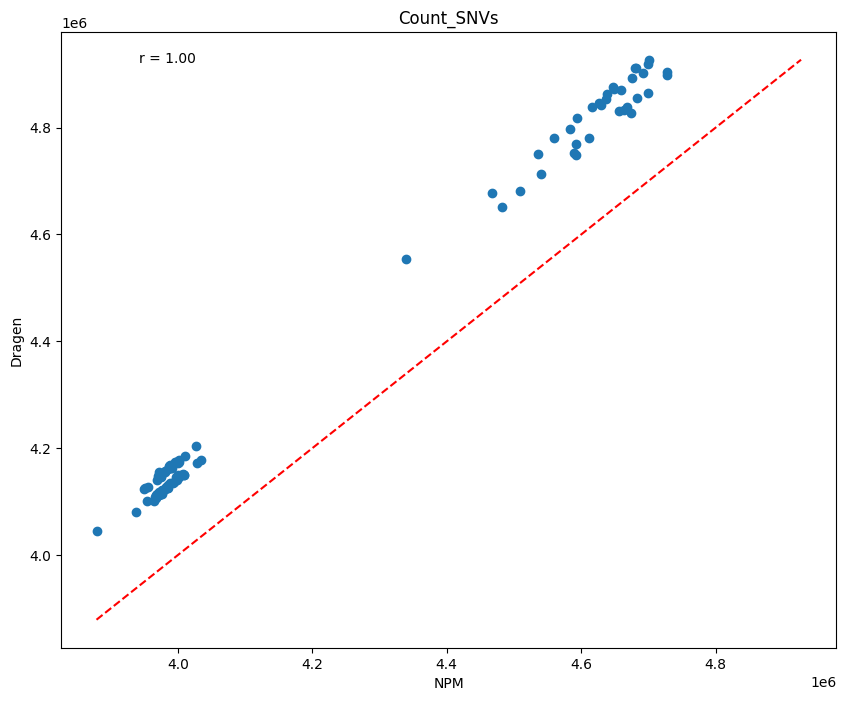

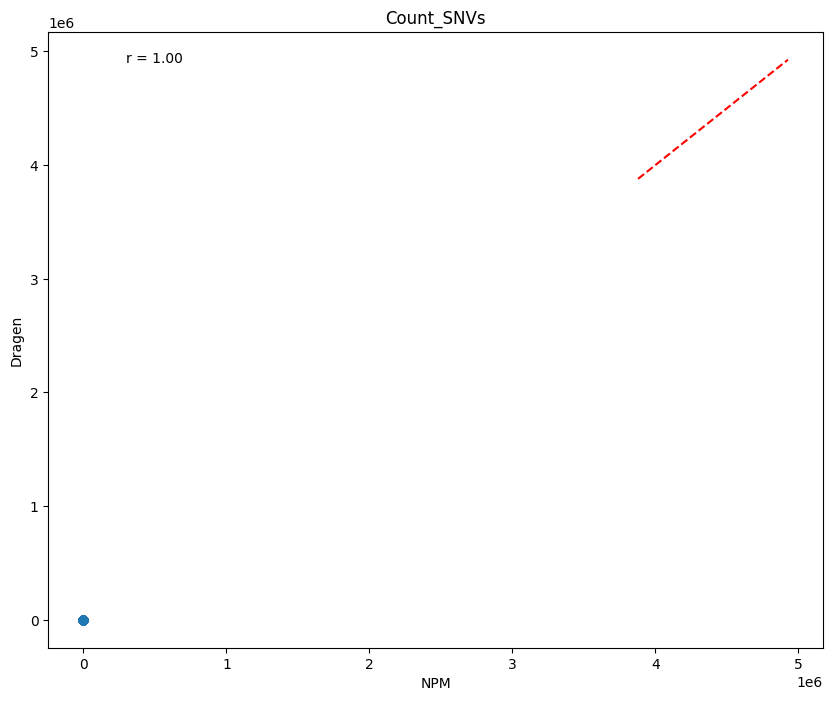

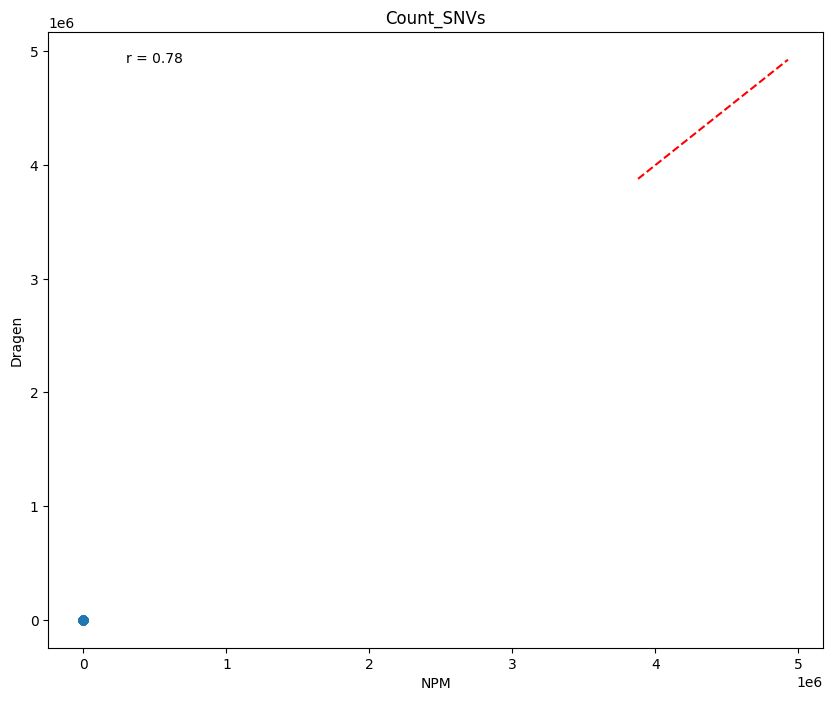

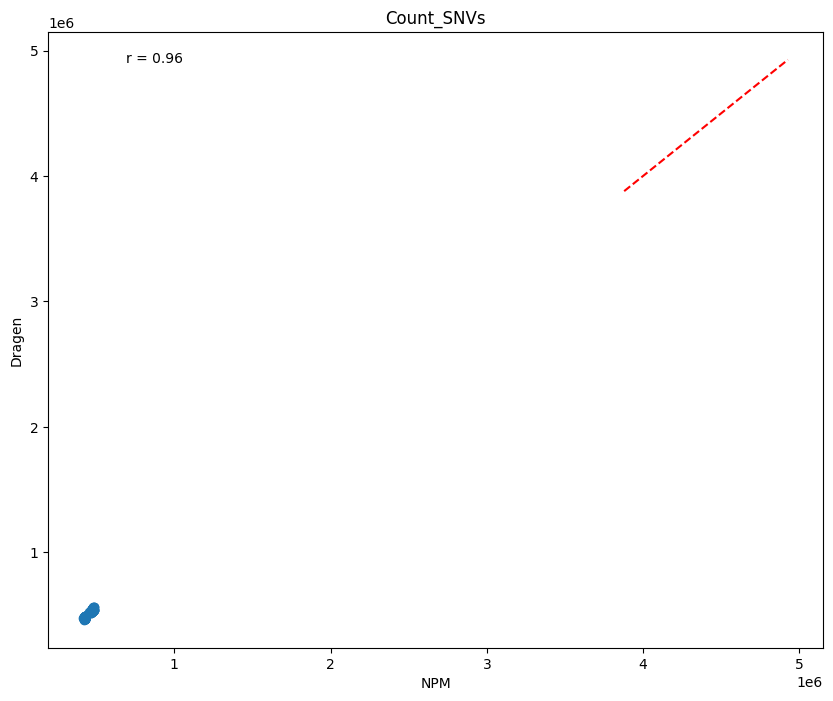

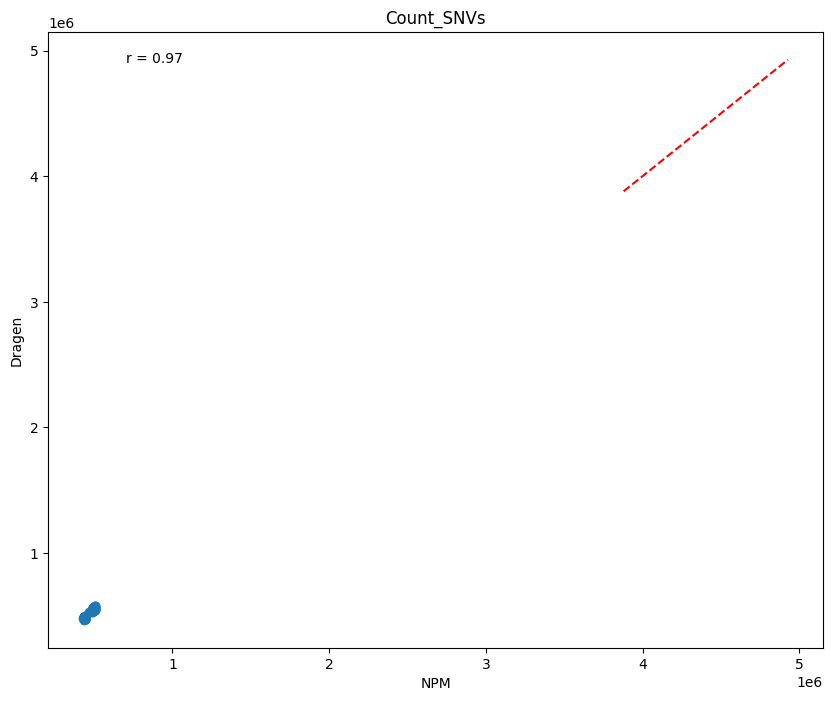

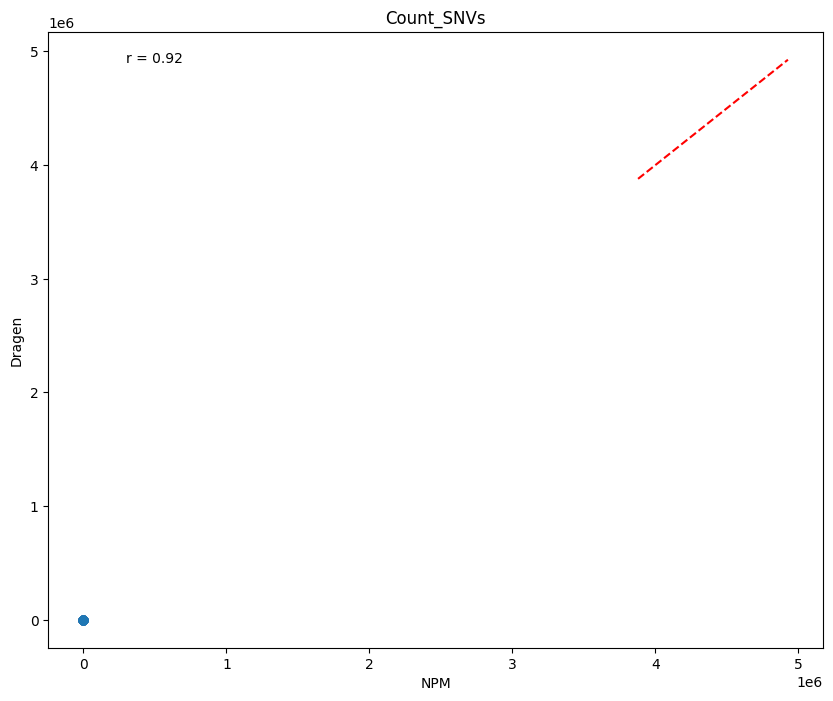

In [243]:
# plt.scatter(x, y, c='tab:blue')
xcols = npm_col.columns.tolist()
ycols = dragen_col.columns.tolist()

for i in range(len(xcols)):
    # sns.scatterplot(data=merged_dft, npm_col[xcols[i]], dragen_col[ycols[i]], hue='Superpopulation_code' )
    plt.scatter(npm_col[xcols[i]], dragen_col[ycols[i]])
    plt.xlabel('NPM')
    plt.ylabel('Dragen')
    # plt.title(xcols)
    plt.title('Count_SNVs')
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    r, p = stats.pearsonr(npm_col[xcols[i]], dragen_col[ycols[i]])
    # plt.plot([npm_col[xcols[i]]lineStart, npm_col[xcols[i]]lineEnd], [dragen_col[ycols[i]]lineStart, dragen_col[ycols[i]]lineEnd], color = 'r', linestyle = 'dashed')
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], color = 'r', linestyle = 'dashed')
    # plt.xlim(lineStart, lineEnd)
    # plt.ylim(lineStart, lineEnd)
    plt.annotate('r = {:.2f}'.format(r), xy=(0.1, 0.95), xycoords='axes fraction')
    plt.show()


# plt.legend(bbox_to_anchor=(1.025,1), loc='upper left', borderaxespad=0.)



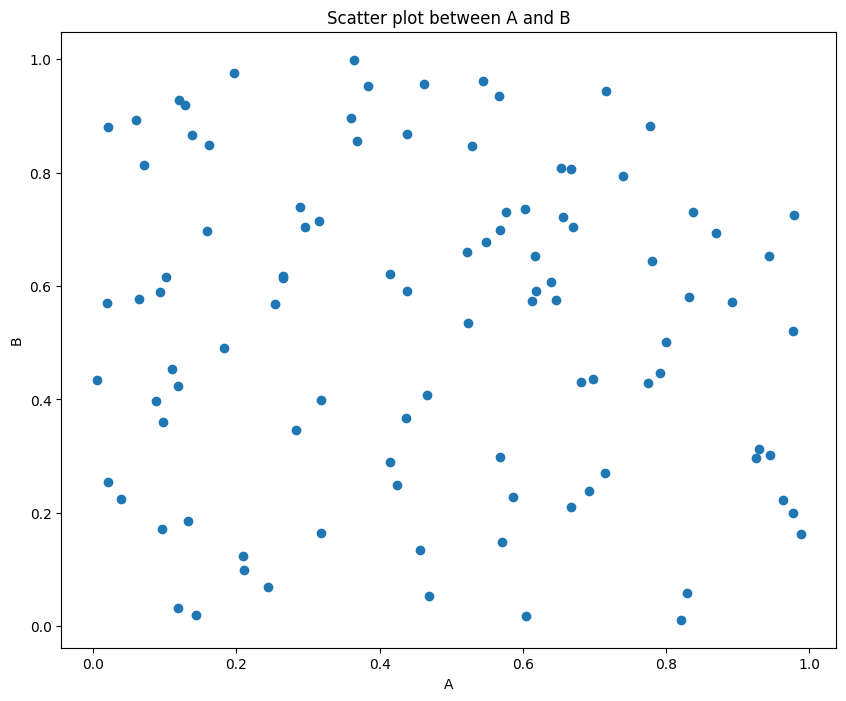

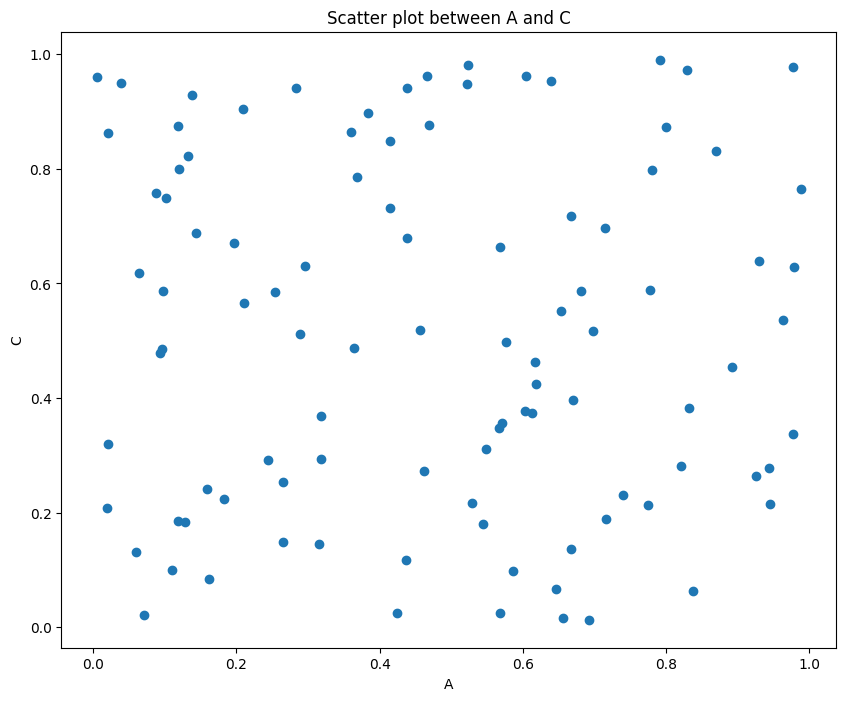

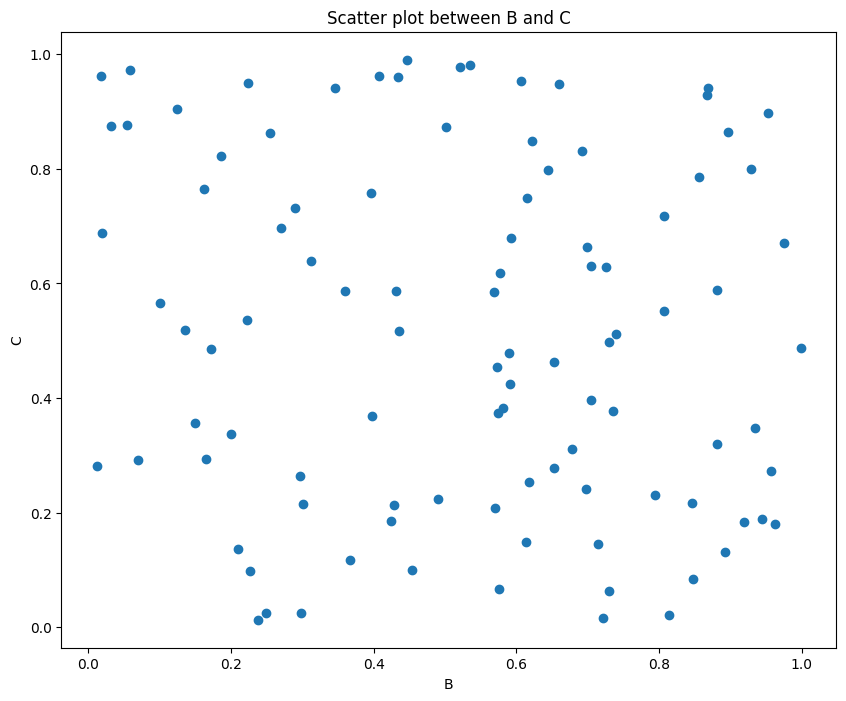

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a DataFrame with random data
np.random.seed(0)
data = {
    'A': np.random.rand(100),
    'B': np.random.rand(100),
    'C': np.random.rand(100),
    'D': np.random.rand(100),
    'E': np.random.rand(100)
}

df = pd.DataFrame(data)

# Step 2: Select a subset of columns
selected_columns = ['A', 'B', 'C']

# Step 3: Use a for loop to create scatter plots for the subset of columns
for i in range(len(selected_columns)):
    for j in range(i+1, len(selected_columns)):
        plt.figure()
        plt.scatter(df[selected_columns[i]], df[selected_columns[j]])
        plt.xlabel(selected_columns[i])
        plt.ylabel(selected_columns[j])
        plt.title(f'Scatter plot between {selected_columns[i]} and {selected_columns[j]}')
        plt.show()